In [1]:
from binarytree import build
from Bio import Phylo
from io import StringIO

import networkx as nt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def build_tree(row):
    raw_tree = np.array(row.split()).astype(np.int)
    tree = [v if v > -1 else None for v in raw_tree]
    return build(tree)

base_path = "../Algorithm/Algorithm/"

### Possible transmission trees

In [11]:
with open(base_path + "possible_trees.txt") as f:
    str_trees = f.readlines()
print("Number of possible trees " + str(len(str_trees)) + "\n")
print("Examples of possible transmission tree based on shape:")
for str_tree in str_trees[:5]:
    print(build_tree(str_tree))

Number of possible trees 161

Examples of possible transmission tree based on shape:

                      ________________3____
                     /                     \
        ____________3__                     1____
       /               \                   /     \
      3______           3______           1     __3
     /       \         /       \         /     /   \
    3       __3       3       __3       1     3     4
   /       /   \             /   \             \
  3       3     3           3     3             3
 /       / \     \         / \     \
3       3   2     3       3   1     3


                      ________________1____
                     /                     \
        ____________3__                     1____
       /               \                   /     \
      3______           3______           1     __3
     /       \         /       \         /     /   \
    3       __3       3       __3       1     3     4
   /       /   \             /   \      

### Transmission tree and network having largest vertex degree

Transmission tree having largest vertex degree 
                      ________________3____
                     /                     \
        ____________3__                     1____
       /               \                   /     \
      3______           3______           1     __3
     /       \         /       \         /     /   \
    3       __3       3       __3       1     3     4
   /       /   \             /   \             \
  3       3     3           3     3             3
 /       / \     \         / \     \
3       3   2     3       3   1     3

Max vertex degree is  3

 Transmission network


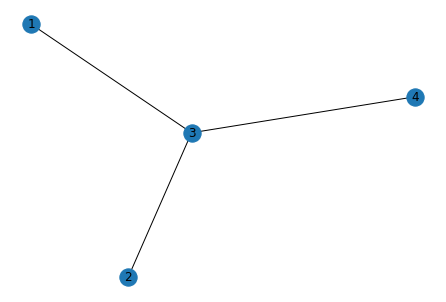

In [12]:
with open(base_path + "max_v_deg_tree.txt") as f:
    tree_str = f.readlines()[0]
print("Transmission tree having largest vertex degree", build_tree(tree_str))

with open(base_path + "max_v_deg_net.txt") as f:
    text = f.readlines()
    param = int(text[0].strip())
    lines = [line.strip() for line in text[1:]]
trans_net = nt.parse_adjlist(lines, nodetype = int)
print("Max vertex degree is ", param)
print("\n Transmission network")
nt.draw(trans_net, with_labels=True)

### Transmission tree and network having the biggest number of terminal edges

Transmission tree having the biggest number of terminal edges 
                      ________________3____
                     /                     \
        ____________3__                     1____
       /               \                   /     \
      3______           3______           1     __3
     /       \         /       \         /     /   \
    3       __3       3       __3       1     3     4
   /       /   \             /   \             \
  3       3     3           3     3             3
 /       / \     \         / \     \
3       3   2     3       3   1     3

Number of terminal edges is  3

 Transmission network


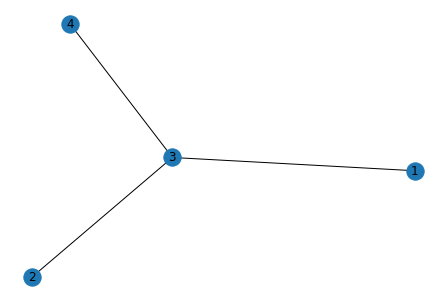

In [13]:
with open(base_path + "max_n_term_edge_tree.txt") as f:
    tree_str = f.readlines()[0]
print("Transmission tree having the biggest number of terminal edges", build_tree(tree_str))

with open(base_path + "max_n_term_edge_net.txt") as f:
    text = f.readlines()
    param = int(text[0].strip())
    lines = [line.strip() for line in text[1:]]
trans_net = nt.parse_adjlist(lines, nodetype = int)
print("Number of terminal edges is ", param)
print("\n Transmission network")
nt.draw(trans_net, with_labels=True)

## Loading real data

In [3]:
AA = Phylo.read("../Data/hepatit_C_outbreak/AA.nwk", "newick")
AA.ladderize()

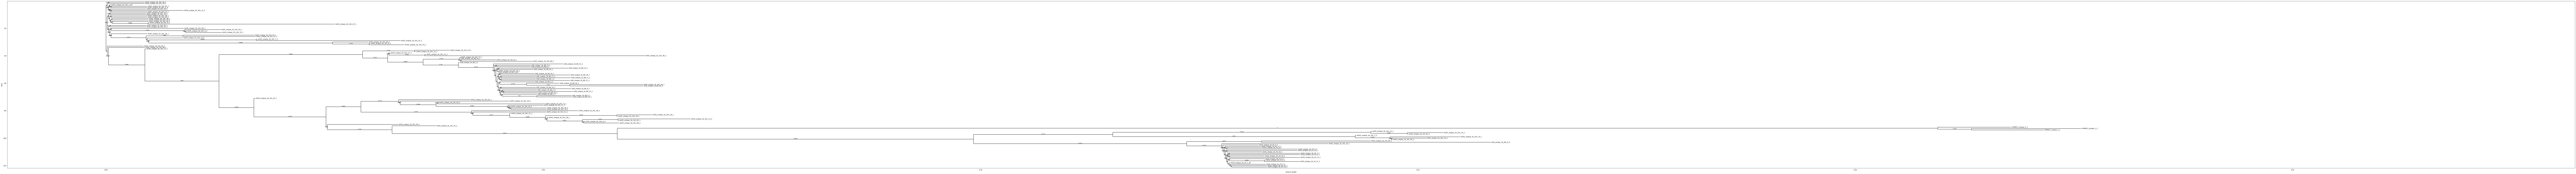

In [4]:
fig = plt.figure(figsize=(300, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(AA, axes=axes)
fig.savefig("AA_raw.png")

In [5]:
graph = Phylo.to_networkx(AA)
adj_matrix = nt.to_numpy_matrix(graph)
nodes = list(graph.nodes())

tree = [-1] * 2 ** 22

In [8]:
for i, row in enumerate(adj_matrix):
    if (np.count_nonzero(row) > 3):
        print("Alert in %s row" % i)

In [9]:
tree[0] = 0
tree[1] = 1000
tree[2] = np.nonzero(adj_matrix[0])[1][2]
tree[3] = np.nonzero(adj_matrix[0])[1][0]
tree[4] = np.nonzero(adj_matrix[0])[1][1]
stack = [2, 3, 4]

In [10]:
while(len(stack) != 0):
    tree_ind = stack.pop()
    node_ind = tree[tree_ind]
    child_nodes = list(np.nonzero(adj_matrix[node_ind])[1][1:])
    if (child_nodes):
        if (len(child_nodes) == 1):
            tree[2 * tree_ind + 1] = child_nodes[0]
        else:
            tree[2 * tree_ind + 1] = child_nodes[0]
            stack.append(2 * tree_ind + 1)
            tree[2 * tree_ind + 2] = child_nodes[1]
            stack.append(2 * tree_ind + 2)

In [11]:
import re
m = re.compile("(^[A-Z]*)([0-9]*)")

genoms = set([c.name for c in AA.get_terminals()])
people = [m.match(g).group(2) for g in genoms]
unique_people = list(set(people))
people_to_ind = dict(zip(unique_people, range(1, len(unique_people) + 1)))
people_ind = [people_to_ind[p] for p in people]
gen_to_pers_ind = dict(zip(genoms, people_ind))

In [12]:
for i, node_ind in enumerate(tree):
    if (node_ind == 1000):
        tree[i] = 0
    elif (node_ind != -1 and nodes[node_ind].name):
        tree[i] = gen_to_pers_ind[nodes[node_ind].name]
    elif (node_ind != -1):
        tree[i] = 0

In [15]:
np.savetxt("AA_tree_sample.txt", tree[:2**12], delimiter="", fmt="%s", newline=" ")

### Playing with NetworkX library

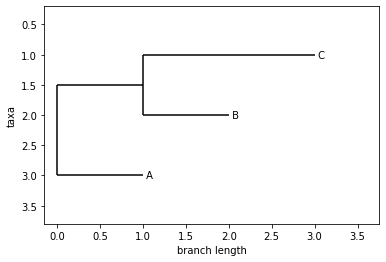

In [19]:
tree = Phylo.read(StringIO('(((C), B), A);'), 'newick')
Phylo.draw(tree)

In [20]:
small_graph = Phylo.to_networkx(tree)
small_graph.nodes()

NodeView((Clade(), Clade(), Clade(), Clade(name='C'), Clade(name='B'), Clade(name='A')))

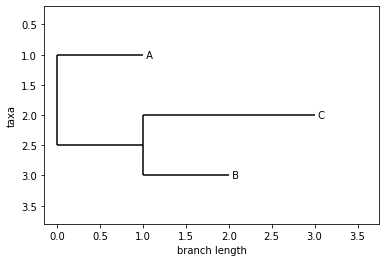

In [15]:
tree.ladderize()
Phylo.draw(tree)

In [16]:
small_graph = Phylo.to_networkx(tree)
small_graph.nodes

NodeView((Clade(), Clade(name='A'), Clade(), Clade(), Clade(name='C'), Clade(name='B')))

In [17]:
nt.to_numpy_matrix(small_graph)

matrix([[0., 1., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [5]:
graph = Phylo.to_networkx(AA)
graph.to_numpy_matrix

AttributeError: 'Graph' object has no attribute 'to_numpy_matrix'

In [7]:
nt.to_numpy_matrix(graph)

matrix([[0.     , 0.00014, 0.     , ..., 0.     , 0.     , 0.     ],
        [0.00014, 0.     , 0.00014, ..., 0.     , 0.     , 0.     ],
        [0.     , 0.00014, 0.     , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.     , 0.     , 0.     , ..., 0.     , 0.00415, 0.00415],
        [0.     , 0.     , 0.     , ..., 0.00415, 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.00415, 0.     , 0.     ]])

In [14]:
for n in graph.nodes():
    print(n)

Clade
Clade
Clade
Clade
Clade
Clade
Clade
AA45_unique_1b_161_10_2
Clade
Clade
AA45_unique_1b_161_7_2
AA45_unique_1b_161_41_1
Clade
AA45_unique_1b_161_58_1
Clade
AA45_unique_1b_161_9_2
AA45_unique_1b_161_53_1
Clade
AA45_unique_1b_161_43_1
AA45_unique_1b_161_47_1
AA45_unique_1b_161_34_1
Clade
AA45_unique_1b_161_48_1
Clade
AA45_unique_1b_161_54_1
Clade
AA45_unique_1b_161_4_3
AA45_unique_1b_161_52_1
Clade
AA45_unique_1b_161_63_1
AA45_unique_1b_161_57_1
Clade
Clade
Clade
AA45_unique_1b_161_18_1
AA45_unique_1b_161_55_1
Clade
Clade
AA45_unique_1b_161_49_1
AA45_unique_1b_161_33_1
Clade
AA45_unique_1b_161_30_1
Clade
AA45_unique_1b_161_5_3
AA45_unique_1b_161_67_1
Clade
AA45_unique_1b_161_16_1
AA45_unique_1b_161_14_2
Clade
Clade
AA45_unique_1b_161_66_1
Clade
Clade
Clade
Clade
AA45_unique_1b_161_19_1
AA45_unique_1b_161_22_1
Clade
Clade
AA45_unique_1b_161_17_1
Clade
AA45_unique_1b_161_11_2
AA45_unique_1b_161_46_1
Clade
Clade
Clade
AA45_unique_1b_161_73_1
AA8_unique_1b_88_24_1
Clade
AA45_unique_1b_1

# Try pruning trees

In [3]:
with open(base_path + "random_tree_sample.txt") as f:
    tree_str = f.readlines()[0]
    print("Random tree sample", build_tree(tree_str))

Random tree sample 
            __________0______________
           /                         \
    ______0____                 ______0__
   /           \               /         \
  0__           0           __0__         0__
 /   \         / \         /     \       /   \
1     0       0   0       0       0     3     0
     / \     /     \     / \     / \         / \
    1   1   1       1   2   2   3   3       4   4



In [4]:
with open(base_path + "pruned_tree_sample.txt") as f:
    tree_str = f.readlines()[0]
    print("Pruned tree sample", build_tree(tree_str))

Pruned tree sample 
  0______
 /       \
1       __0__
       /     \
      0       0
     / \     / \
    2   3   3   4



In [5]:
with open(base_path + "random_colored_tree.txt") as f:
    tree_str = f.readlines()[0]
    print("Random colored tree", build_tree(tree_str))

Random colored tree 
  1______
 /       \
1       __2__
       /     \
      2       3
     / \     / \
    2   3   3   4



In [6]:
with open(base_path + "AA_pruned.txt") as f:
    tree_str = f.readlines()[0]
    print("Pruned tree AA real", build_tree(tree_str))

Pruned tree AA real 
                                ______________________________________________________________________________________________0__
                               /                                                                                                 \
        ______________________0__________________________________                                                                 0__
       /                                                         \                                                               /   \
    __0__________                       __________________________0______                                                       2     0__
   /             \                     /                                 \                                                           /   \
  0         ______0__               __0______                           __0______________                                           2     0_________________________________